# Методы поиска точных решений уравнения Власова

## Метод характеристик

$$
\frac{\partial f}{\partial t} + \mathbf A\cdot\nabla_{\vec r, \vec p}f = 0
$$

$$
\begin{aligned}
    \mathbf A &= \left\{\frac{\vec p}{\gamma m}, q\vec E + \frac{q}{\gamma mc}\left[\vec p \times \vec B\right]\right\} \\
    \nabla_{\vec r, \vec p} &\equiv \left\{\frac{\partial}{\partial \vec r}, \frac{\partial}{\partial \vec p}\right\}
\end{aligned}
$$

* Это уравнение переноса в 6-мерном пространстве со скоростью $\mathbf{A}$

### Характеристики

Рассмотрим систему уравнений

$$
\frac{d\mathbf X}{dt} = \mathbf A(\mathbf X, t)
$$
$$
\mathbf X(s) = \left\{\vec r, \vec p\right\} \equiv \mathbf x
$$

* $\mathbf X(t; s, \mathbf x)$ — характеристики уравнения переноса (траектории частиц в фазовом пространстве)

### Свойства характеристик

* Транзитивность:
$$\mathbf X\left(t3; t2, \mathbf X(t2; t1, \mathbf x)\right) = \mathbf X(t3; t1, \mathbf x)$$

* Отображение $\mathbf x = \mathbf X(t; s, \mathbf y)$ — диффеоморфизм (взаимно однозначное и гладкое) по отношению к $\mathbf y = \mathbf X(s; t, \mathbf x)$

* Если $\nabla\mathbf A = 0$, то якобиан отображения:
$$J(t;s) \equiv {\rm det} (\nabla_{\mathbf x}\mathbf X(t;s,\mathbf x)) = 1$$

* Характеристики дают решение исходного дифференциального уравнения:
$$
f(t,\mathbf x) = f_0\left(\mathbf X(0;t,\mathbf x)\right)
$$

### Пример: Свободный одномерный поток

$$
\frac{\partial f}{\partial t} + v \frac{\partial f}{\partial x} = 0
$$

* Уравнения характеристик:
$$
\frac{dX}{dt} = V
$$
$$
\frac{dV}{dt} = 0
$$

* Уравнения характеристик:
$$
\frac{dX}{dt} = V
$$
$$
\frac{dV}{dt} = 0
$$

* Их решение:
$$\begin{aligned}
    V(t; s, x, v) &= v \\
    X(t; s, x, v) &= x + v(t-s)
\end{aligned}$$

* Решение исходного уравнения:
$$
f(x,v,t) = f_0(x-vt,v)
$$

In [1]:
using Plots
using Interpolations

In [2]:
x = -100:100
v = -50:50
f₀ = [exp(-(j/10)^2)*exp(-(i/40)^6) for i = x, j = v];

In [3]:
itp = interpolate(f₀, BSpline(Cubic(Line(OnGrid()))))
f_itp = scale(itp, x, v);
f_etp = extrapolate(f_itp, 0);

In [4]:
ff = [f_etp(i - j*t, j) for i = x, j = v, t=0:0.5:2.5];

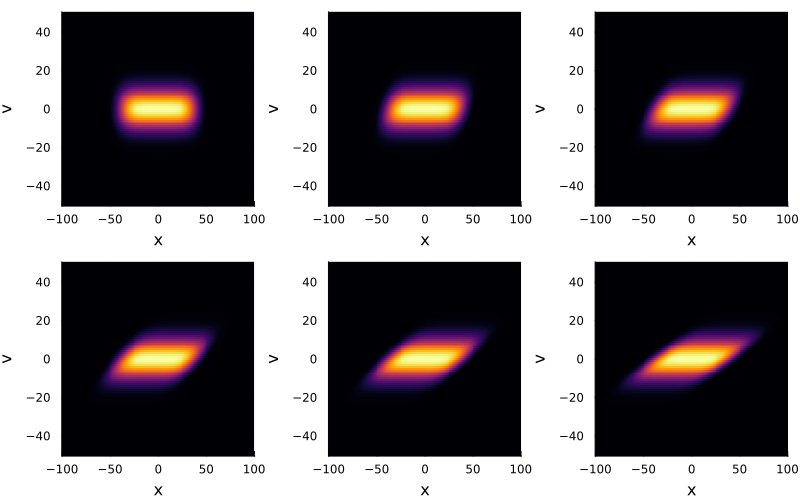

In [5]:
h = [heatmap(x, v, ff[:,:,i]', legend = :none) for i = 1:6]

p = plot(h...,
    size = (800, 500));

xlabel!("x")
ylabel!("v")

### Пример: Электронный пучок вблизи нуля линейно нарастающего поля

* Имеем внешнее поле:
$$
E = - x
$$

$$
\frac{\partial f}{\partial t} + v \frac{\partial f}{\partial x} - x \frac{\partial f}{\partial v} = 0
$$

* Уравнения характеристик:
$$
\frac{dX}{dt} = V
$$
$$
\frac{dV}{dt} = -X
$$

* Уравнения характеристик:
$$
\frac{dX}{dt} = V
$$
$$
\frac{dV}{dt} = -X
$$

* Их решение:
$$
V(t; s, x, v) = v\cos(t-s) - x\sin(t-s)
$$
$$
X(t; s, x, v) = x\cos(t-s) + v\sin(t-s)
$$

* Решение исходного уравнения:
$$
f(x,v,t) = f_0(x\cos t - v\sin t, v\cos t + x\sin t)
$$

In [7]:
x = -100:100
v = -50:50
f₀ = [exp(-(j/10)^2)*exp(-(i/40)^6) for i = x, j = v];

In [8]:
itp = interpolate(f₀, BSpline(Cubic(Line(OnGrid()))))
f_itp = scale(itp, x, v);
f_etp = extrapolate(f_itp, 0);

In [9]:
ff = [f_etp(i*cos(t) - j*sin(t), j*cos(t) + i*sin(t)) for i = x, j = v, t=0.:0.25:8];

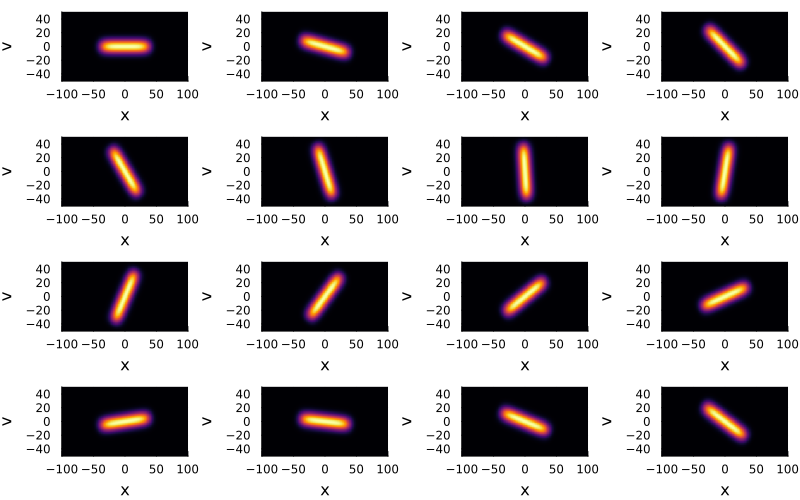

In [10]:
h = [heatmap(x, v, ff[:,:,i]', legend = :none) for i = 1:16]

p = plot(
#     h1, h2, h3, h4, h5,
    h...,
    size = (800, 500),
#     layout = @layout [a b c d e]
    );

xlabel!("x")
ylabel!("v")

## Метод интегралов движения для уравнения Власова

* В стационарном случае траектория движения частицы в 6-мерном пространстве может быть задана 5-ю интегралами движения (первыми интегралами системы уравнений Гамильтона) $\left\{\mathcal{I}_1\left(\vec r,\vec p\right)\,\mathcal{I}_2\left(\vec r,\vec p\right)\dots\mathcal{I}_5\left(\vec r,\vec p\right)\right\}$:
$$
f\left(t,\vec r,\vec p\right) \equiv g\left(\mathcal{I}_1,\mathcal{I}_2\dots\mathcal{I}_5\right)
$$

* Эффективно при высокой степени симметрии задачи:
  - Часть интегралов — аддитивные, связанным с симметрией (энергия, обобщённый импульс)
  - От остальных интегралов функция не зависит

* Если не удаётся найти все интегралы, то известные позволяют понизить количество переменных

* В качестве приближённых интегралов могут выступать адиабатические инварианты

### Энергетическая подстановка

* В стационарном случае всегда сохраняется энергия (сама функция Гамильтона)

* В одномерном случае в отсутствии магнитного поля и поперечных электрических полей это позволяет полностью исключить уравнение Власова

* $f(\vec r, \vec p) \equiv f(x, p_x)$

$$
H = \frac{p_x^2}{2m} + q\phi(x)
$$
* $\phi(x)$ — электростатический потенциал

$$
f(x,p_x) = g(H)
$$

$$\begin{aligned}
    \frac{p_x}{m}\frac{\partial f}{\partial x} - q\frac{d\phi}{dx} \frac{\partial f}{\partial p_x} &= \frac{p_x}{m}\frac{d g}{d H}\frac{\partial H}{\partial x} - q\frac{d\phi}{dx} \frac{d g}{d H}\frac{\partial H}{\partial p_x} = \nonumber\\
    &= \frac{p_x}{m}\frac{d g}{d H}q\frac{d\phi}{dx} - q\frac{d\phi}{dx} \frac{d g}{d H}\frac{p_x}{m} = 0
\end{aligned}$$

* Распределение поля и плазмы в пространстве будет определяться решением уравнения Пуассона:
$$
\frac{d^2\phi}{dx^2} = -4\pi\sum_s\int\limits_{-\infty}^{+\infty} q_sf_s(x,p_x)dp_x = -4\pi\sum_s\int\limits_{-\infty}^{+\infty} q_sg_s(H(x,p_x))dp_x
$$

#### Пример: плоский дебаевский слой

* Ионы будем считать неподвижными и равномерно распределёнными в $x\le 0$:
$$
N_i(x) = N_{i0}\Theta(-x)
$$
$$
\Theta(x) = 
    \left\{
    \begin{aligned}
        &1 &\iff x \ge 0 \\
        &0 &\iff x < 0
    \end{aligned}
    \right.
$$

* Уравнение Пуассона принимает вид:
$$
\frac{d^2\phi}{dx^2} = -4\pi e\left(N_i(x) - \int\limits_{-\infty}^{+\infty} g(H(x,p_x))dp_x\right)
$$

* Пусть электроны распределены по закону Больцмана — Максвелла:
$$
g(H) = \frac{N_{e0}}{\sqrt{2\pi m_e T}}\exp\left\{-\frac{H}{T}\right\}
$$
* $N_{e0}$ — фоновая концентрация электронов в области, где потенциал равен нулю

$$\begin{aligned}
    \frac{d^2\phi}{dx^2} &=
    -4\pi e\left(N_i(x) - \int\limits_{-\infty}^{+\infty} \frac{N_{e0}}{\sqrt{2\pi m_e T}}\exp\left\{-\frac{p_x^2}{2mT}+\frac{e\phi}{T}\right\}dp_x\right) = \nonumber\\
    &= -4\pi e\left(N_i(x) - N_{e0}\exp\left\{\frac{e\phi}{T}\right\}\right)
\end{aligned}$$

* Если потенциал спадает к нулю внутри плазмы, то $N_{i0} = N_{e0}$

* Безразмерные переменные:
$$\begin{aligned}
    \varphi &= \frac{e\phi}{T} \\
    \xi &= x\left(\frac{4\pi e^2 N_{e0}}{T}\right)^{\frac12} \equiv \frac{x}{r_D}
\end{aligned}$$
* $r_D$ — радиус Дебая

* Получаем:
$$
\frac{d^2\varphi}{d\xi^2} = e^\varphi - \Theta(-x)
$$
* Это нелинейное уравнение, не имеющее аналитического решения

* Рассмотрим область $x>0$:
$$
\frac{d^2\varphi}{d\xi^2} = e^\varphi
$$

* Обозначим $y = d\varphi/d\xi$ и перепишем:
$$\begin{aligned}
    \frac{d\varphi}{d\xi} &= y \\
    \frac{dy}{d\xi} &= e^\varphi
\end{aligned}$$

* Поделим и получим:
$$\begin{aligned}
    \frac{dy}{d\varphi} &= \frac{e^\varphi}{y} \\
    ydy &= e^\varphi d\varphi \\
    y^2 - 2e^\varphi &= C
\end{aligned}$$

* $C=0$ (в области где поле $E = -d\phi/dx$ отсутствует, потенциал устремляется в бесконечность: $\varphi \to -\infty$ при $y=0$)

$$\begin{aligned}
    y^2 &= 2e^\varphi \\
    y_\pm &= \pm\sqrt{2}\exp\left\{\frac{\varphi}{2}\right\} \\
    \frac{d\varphi_\pm}{d\xi} &= \pm\sqrt{2}\exp\left\{\frac{\varphi}{2}\right\} \\
    \frac{d\varphi_\pm}{\exp\left\{\varphi/2\right\}} &= \pm\sqrt{2}d\xi \\
    -2\exp\left\{-\frac{\varphi_\pm}{2}\right\} &= \pm\sqrt{2}(\xi-\xi_0) \\
    \varphi_\pm &= -2\ln\left\{\mp\frac{\xi-\xi_0}{\sqrt{2}}\right\}
\end{aligned}$$

* $\varphi_-$ определено в области $\xi > \xi_0$, $\varphi_+$ — в области $\xi < \xi_0$. Поскольку мы ищем решение во всей области $\xi > 0$, выберем решение $\varphi_-$

$$
N_e = N_{e0}\exp\left\{\frac{e\phi}{T}\right\} = \frac{2N_{e0}}{(\xi-\xi_0)^2}
$$

* Рассмотрим теперь область $x \le 0$:
$$
\frac{d^2\varphi}{d\xi^2} = e^\varphi - 1
$$

* Проинтегрируем один раз аналогично случаю $x>0$:
$$\begin{aligned}
    \frac{d\varphi}{d\xi} &= y \\
    \frac{dy}{d\xi} &= e^\varphi - 1 \\
    \frac{dy}{d\varphi} &= \frac{e^\varphi - 1}{y} \\
    ydy &= \left(e^\varphi - 1\right) d\varphi \\
    y^2 - 2e^\varphi + 2\varphi &= C
\end{aligned}$$

* В глубине плазмы ($x\to-\infty$) поле и потенциал спадают до нуля: $\varphi\to 0$, $y\to 0$, следовательно, $C=-2$

* Получаем:
$$
\frac{d\varphi_\pm}{d\xi} = \pm\sqrt{2}\left(e^{\varphi_\pm} - \varphi_\pm - 1\right)^\frac12
$$

* Его решение надо сшить с решением уравнения в области $x>0$. Выберем в качестве решения снова $\varphi_-$ и приравняем выражения для $y^2$ в точке $x=0$:
$$
2e^{\varphi_0} = 2\left(e^{\varphi_0} - \varphi_0 - 1\right)
$$
* $\varphi_0 \equiv \varphi(0)$

* Получаем $\varphi_0 = -1$. Его следует использовать в качестве граничного условия при численном решении уравнения

* Найдём также $\xi_0$:
$$\begin{aligned}
    \varphi_0 &= -2\ln\left\{-\frac{\xi_0}{\sqrt{2}}\right\} \\
    \xi_0 &= -\sqrt{2}e^{-\varphi_0/2} = -\sqrt{2e}
\end{aligned}$$

<img src="../pics/debye.png" width="100%" />

## Что почитать

* Bertrand, Del Sarto, Ghizzo. _The Vlasov Equation 1: History and General Properties_, Chapter 5
* Eric Sonnendrücker. _Numerical methods for the Vlasov equations_. Lecture notes. 2013.
* G. Dimarco, L. Pareschi. Numerical methods for kinetic equations. Acta Numerica, Cambridge University Press (CUP), 2014, pp. 369-520.
* P. Degond. _Macroscopic limits of the Boltzmann equation: a review_ // Modeling and Computational Methods for Kinetic Equations. Ed. P. Degond, L. Pareschi, G. Russo. 2004. P. 3.

## Дома
* Методом характеристик решить задачу о динамике плазмы во внешнем однородном магнитном поле:
$$\begin{gathered}
f \equiv f(t, v_x, v_y) \\
\vec B = \vec z_0 B_0 \\
f(0, v_x, v_y) = F(v_x, v_y)
\end{gathered}$$